# **Tendencias Salariales en Empleos de Ciencia de Datos, AI y ML (2025)**

**Autor:** Laura Cardona Ahumada, Elian Martinez Orozco, Evelyn Mondul y Luis Pino Perez

**Fecha:** Julio 2025  

---

### **Introducción**

Esta base de datos presenta información actualizada sobre salarios globales en 2025 para profesionales de Ciencia de Datos, Aprendizaje Automático e Inteligencia Artificial. Fue construida a partir de fuentes públicas como AIJobs, 365DataScience, Payscale, KDnuggets y ZipRecruiter, y está orientada a apoyar análisis de mercado, modelos predictivos, visualizaciones interactivas y estudios sobre trabajo remoto.

El conjunto de datos fue obtenido desde Kaggle, a partir del recurso publicado por el usuario adilshamim8 bajo el título "Salaries for Data Science Jobs": https://www.kaggle.com/datasets/adilshamim8/salaries-for-data-science-jobs?resource=download. Su contenido resulta útil para investigadores, profesionales del sector, estudiantes y reclutadores que buscan entender las dinámicas actuales de compensación en el ámbito tecnológico.

---

### **Objetivo**

El presente análisis tiene como objetivo desarrollar un modelo de aprendizaje automático capaz de predecir el rango salarial de empleos relacionados con Ciencia de Datos, Inteligencia Artificial y Aprendizaje Automático, a partir de información sobre características laborales y profesionales.  
Además, se realizará un análisis exploratorio detallado de los datos para identificar patrones, desigualdades y factores determinantes del salario en estas áreas tecnológicas emergentes.

---

### **Notebook**

1. Introducción  
2. Carga y revisión de los datos  
3. Limpieza y transformación de variables  
4. Análisis exploratorio (EDA)  
5. Visualización de variables numéricas y categóricas  
6. Codificación y preparación para modelado  
7. Modelado predictivo con algoritmos de Machine Learning  
8. Evaluación y comparación de modelos  
9. Conclusiones y recomendaciones  
10. Anexos y referencias

---

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



sns.set(style='whitegrid', palette='Set2')
plt.rcParams['figure.figsize'] = (10, 6)


#### Archivo CSV

In [3]:
# Cargar archivo CSV
df = pd.read_csv("salaries.csv")

# Visualizar las primeras filas
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Software Engineer,218900,USD,218900,US,100,US,M
1,2025,SE,FT,Software Engineer,186065,USD,186065,US,100,US,M
2,2025,SE,FT,System Engineer,158000,USD,158000,US,0,US,M
3,2025,SE,FT,System Engineer,140000,USD,140000,US,0,US,M
4,2025,SE,FT,Data Engineer,164600,USD,164600,US,0,US,M


#### Dataset

In [5]:

# Primeras filas
print(df.head())

# Dimensiones
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

# Tipos de datos
print(df.dtypes)

# Información general
print(df.info())

# Estadísticas descriptivas
print(df.describe(include='all'))


   work_year experience_level employment_type          job_title  salary  \
0       2025               SE              FT  Software Engineer  218900   
1       2025               SE              FT  Software Engineer  186065   
2       2025               SE              FT    System Engineer  158000   
3       2025               SE              FT    System Engineer  140000   
4       2025               SE              FT      Data Engineer  164600   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         218900                 US           100   
1             USD         186065                 US           100   
2             USD         158000                 US             0   
3             USD         140000                 US             0   
4             USD         164600                 US             0   

  company_location company_size  
0               US            M  
1               US            M  
2               US        

#### Verificación de valores nulos y duplicados

In [6]:
print("Valores nulos por columna:")
print(df.isnull().sum())
print("\nFilas duplicadas:", df.duplicated().sum())


Valores nulos por columna:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Filas duplicadas: 77788


#### Distribución de variables numéricas

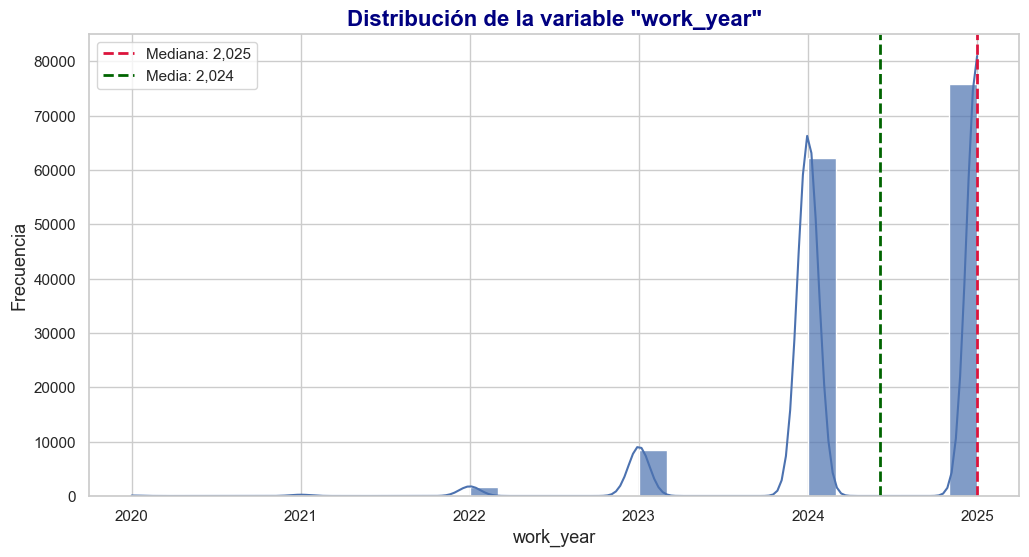

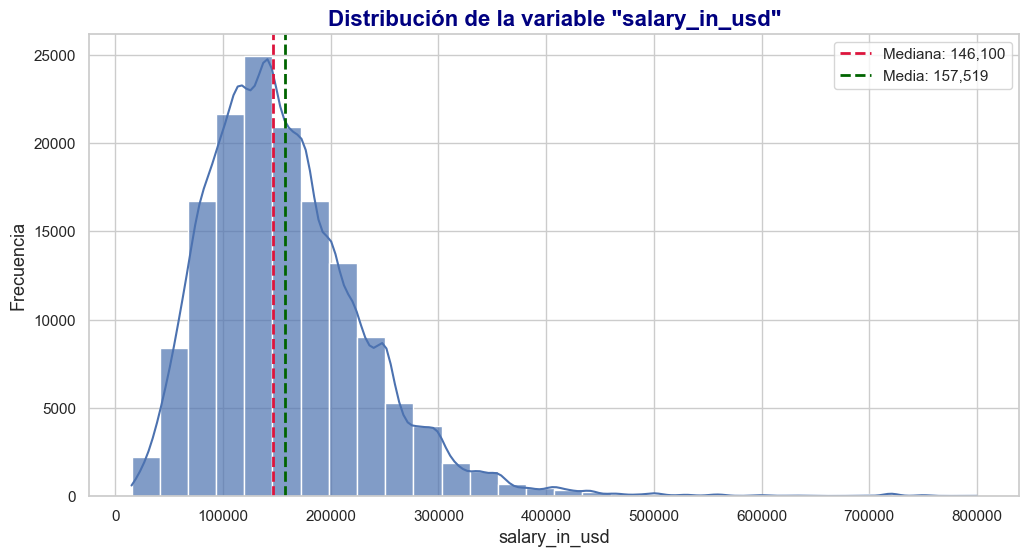

In [7]:

sns.set(style="whitegrid")  

numerical_cols = df.select_dtypes(include=np.number).columns

# Lista de columnas que quieres excluir
excluir = ['salary', 'remote_ratio']  # cambia los nombres según tu dataset

# Filtrar columnas que sí quieres graficar
cols_a_graficar = [col for col in numerical_cols if col not in excluir]

for col in cols_a_graficar:
    plt.figure(figsize=(12, 6))

    sns.histplot(df[col], 
                 kde=True, 
                 bins=30, 
                 color='#4C72B0', 
                 edgecolor='white', 
                 alpha=0.7)

    plt.axvline(df[col].median(), 
                color='crimson', 
                linestyle='--', 
                linewidth=2, 
                label=f'Mediana: {df[col].median():,.0f}')

    plt.axvline(df[col].mean(), 
                color='darkgreen', 
                linestyle='--', 
                linewidth=2, 
                label=f'Media: {df[col].mean():,.0f}')

    plt.title(f'Distribución de la variable "{col}"', fontsize=16, fontweight='bold', color='navy')
    plt.xlabel(col, fontsize=13)
    plt.ylabel('Frecuencia', fontsize=13)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.legend()
    plt.show()

#### Distribución de variables categóricas

C:\Users\LUIS PINO\AppData\Local\Temp\ipykernel_28912\3857176222.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df,
C:\Users\LUIS PINO\AppData\Local\Temp\ipykernel_28912\3857176222.py:11: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  ax = sns.countplot(data=df,


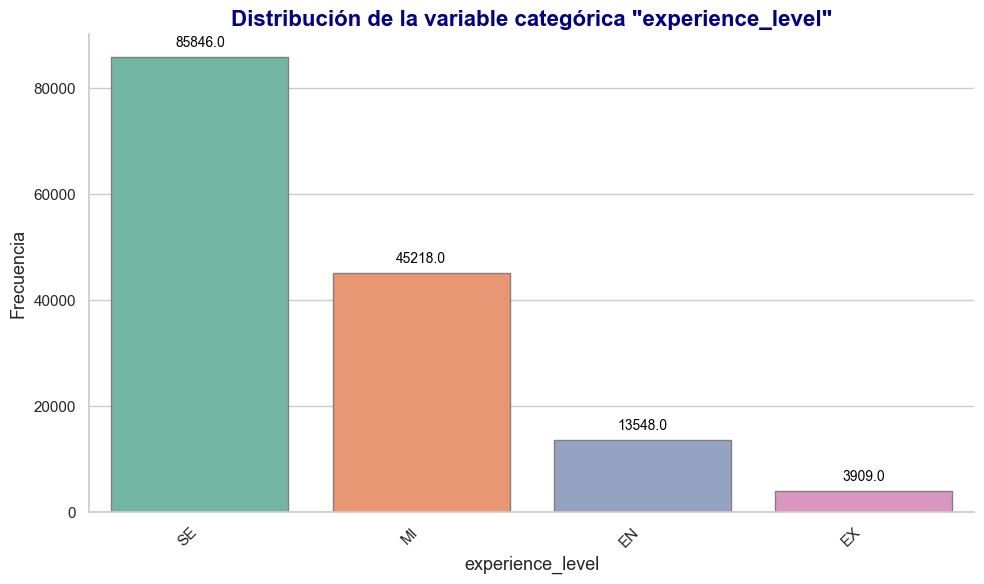

C:\Users\LUIS PINO\AppData\Local\Temp\ipykernel_28912\3857176222.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df,
C:\Users\LUIS PINO\AppData\Local\Temp\ipykernel_28912\3857176222.py:11: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  ax = sns.countplot(data=df,


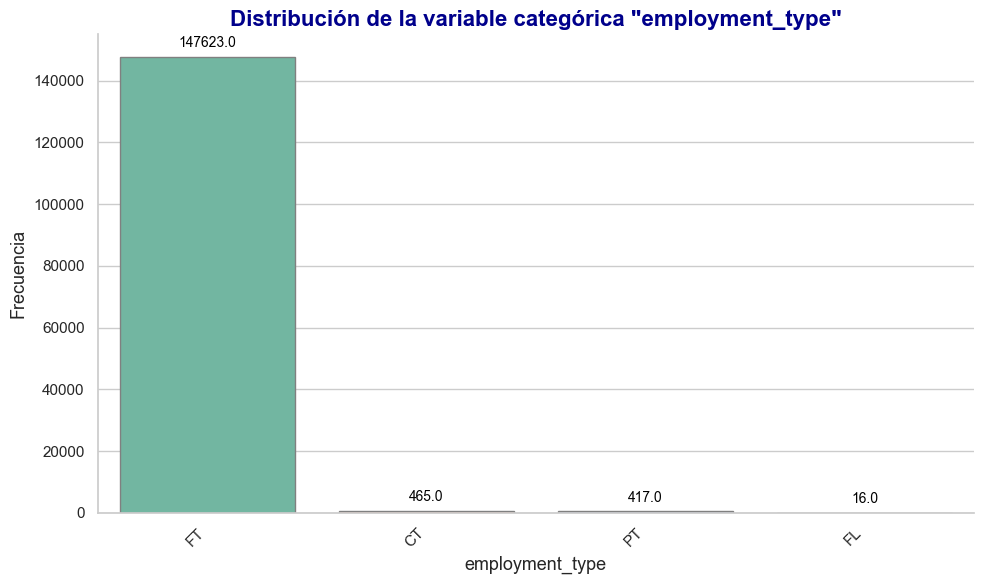

C:\Users\LUIS PINO\AppData\Local\Temp\ipykernel_28912\3857176222.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df,
C:\Users\LUIS PINO\AppData\Local\Temp\ipykernel_28912\3857176222.py:11: UserWarning: 
The palette list has fewer values (8) than needed (419) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(data=df,


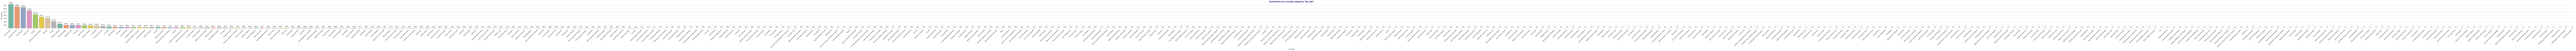

C:\Users\LUIS PINO\AppData\Local\Temp\ipykernel_28912\3857176222.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df,
C:\Users\LUIS PINO\AppData\Local\Temp\ipykernel_28912\3857176222.py:11: UserWarning: 
The palette list has fewer values (8) than needed (26) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(data=df,


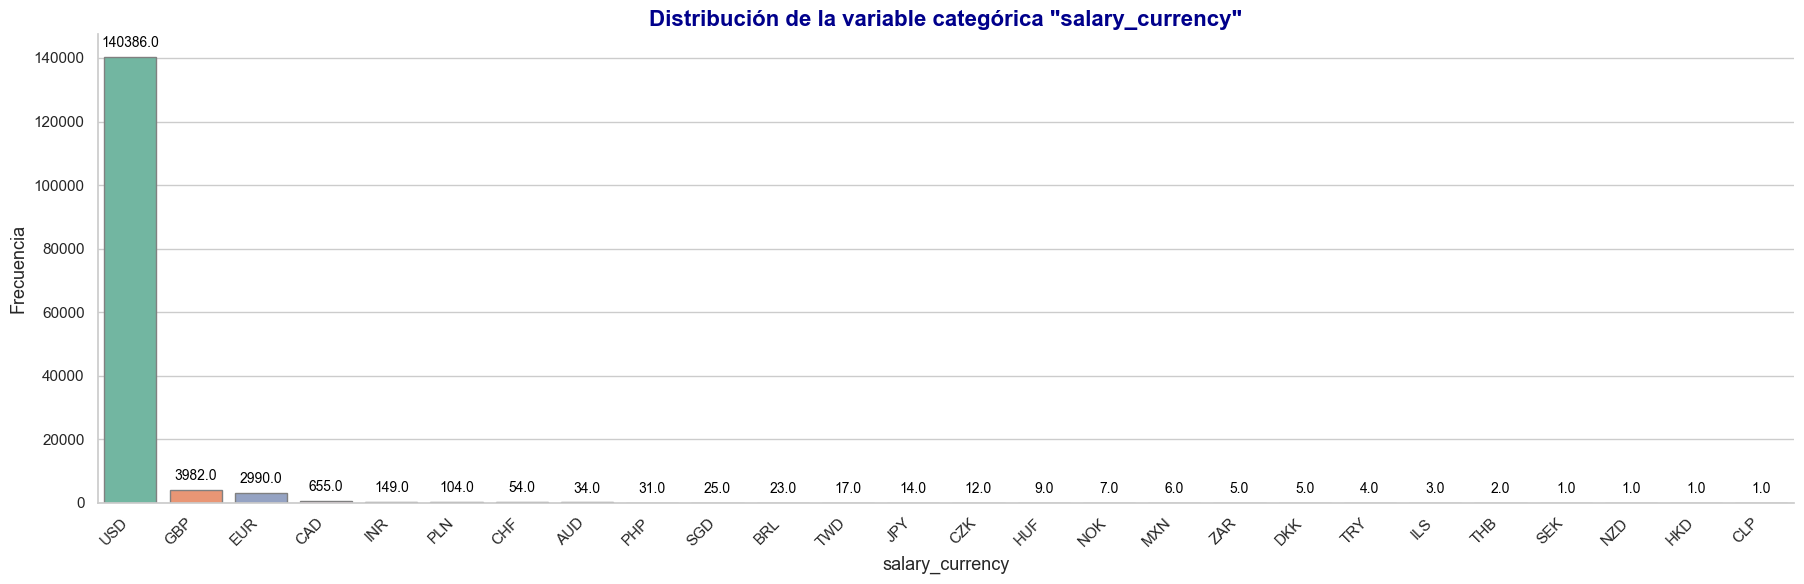

C:\Users\LUIS PINO\AppData\Local\Temp\ipykernel_28912\3857176222.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df,
C:\Users\LUIS PINO\AppData\Local\Temp\ipykernel_28912\3857176222.py:11: UserWarning: 
The palette list has fewer values (8) than needed (104) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(data=df,


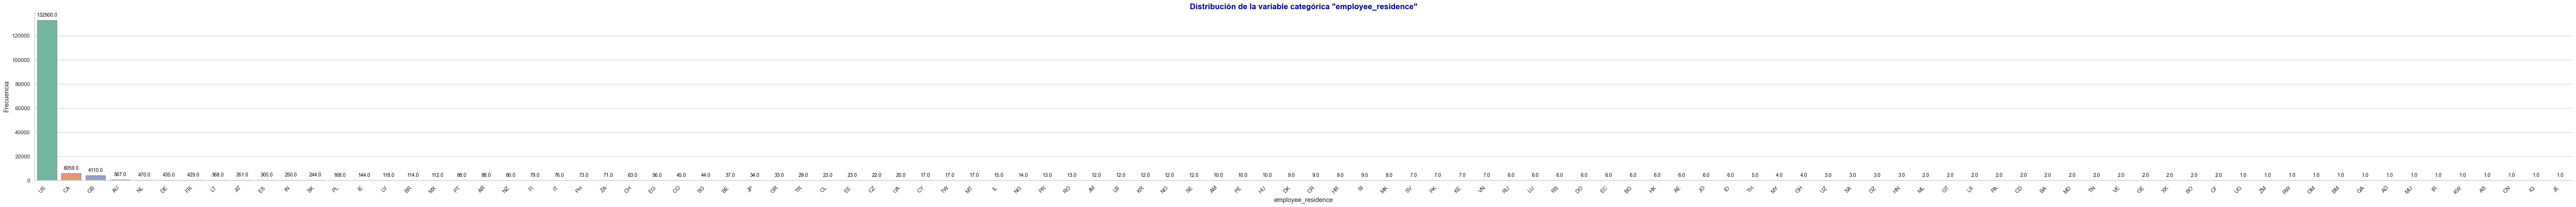

C:\Users\LUIS PINO\AppData\Local\Temp\ipykernel_28912\3857176222.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df,
C:\Users\LUIS PINO\AppData\Local\Temp\ipykernel_28912\3857176222.py:11: UserWarning: 
The palette list has fewer values (8) than needed (97) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(data=df,


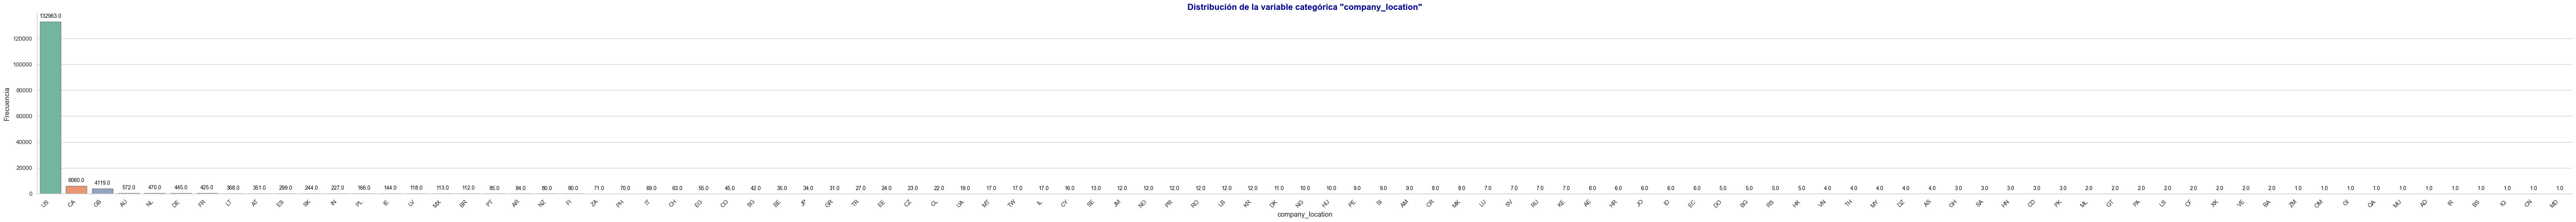

C:\Users\LUIS PINO\AppData\Local\Temp\ipykernel_28912\3857176222.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df,
C:\Users\LUIS PINO\AppData\Local\Temp\ipykernel_28912\3857176222.py:11: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  ax = sns.countplot(data=df,


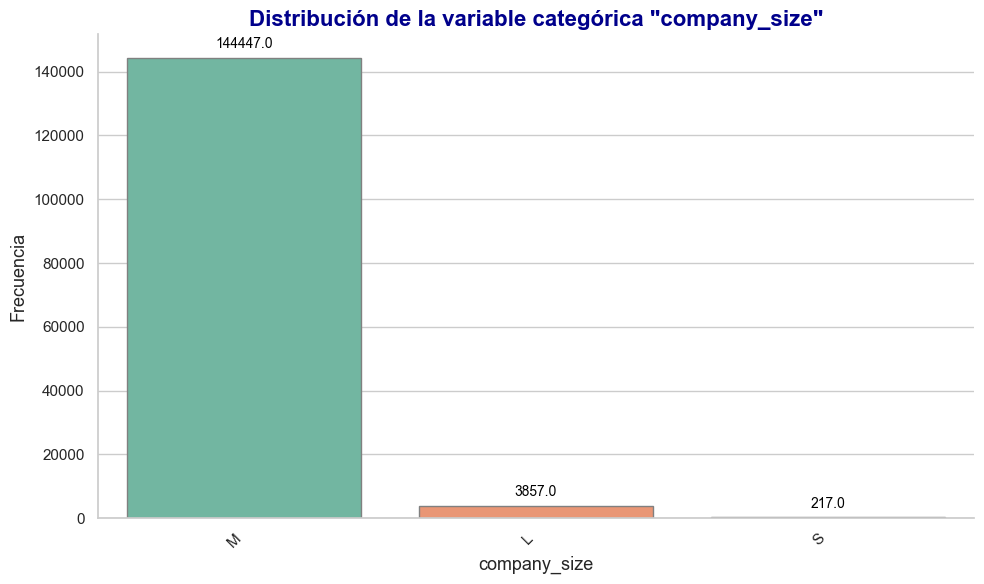

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
palette_cat = sns.color_palette("Set2")
categorical_cols = df.select_dtypes(include='object').columns


for col in categorical_cols:
    plt.figure(figsize=(max(10, len(df[col].unique()) * 0.7), 6))
    ax = sns.countplot(data=df,
                       x=col,
                       order=df[col].value_counts().index,
                       palette=palette_cat,
                       edgecolor='gray')
    plt.title(f'Distribución de la variable categórica "{col}"',
              fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel(col, fontsize=13)
    plt.ylabel('Frecuencia', fontsize=13)
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.yticks(fontsize=11)
    for bar in ax.patches:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{height}',
                        (bar.get_x() + bar.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=10,
                        color='black', xytext=(0, 5),
                        textcoords='offset points')

    sns.despine()
    plt.tight_layout()
    plt.show()

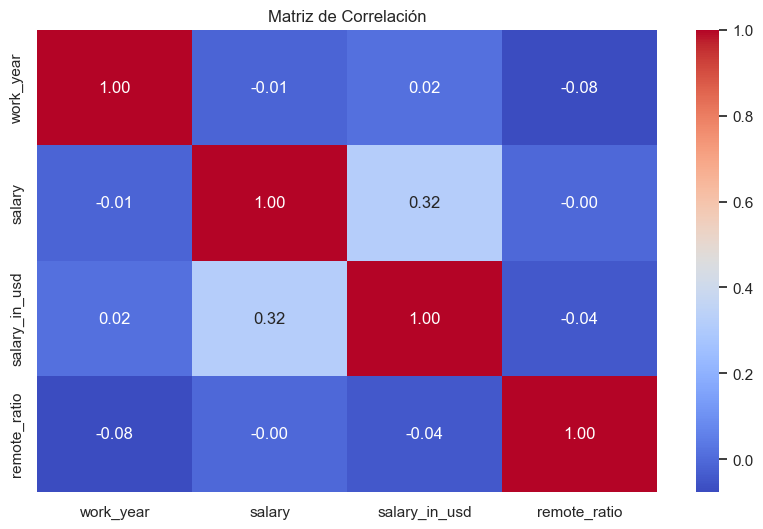

In [14]:
# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


#### Relaciones entre variables numéricas y 'Salary'

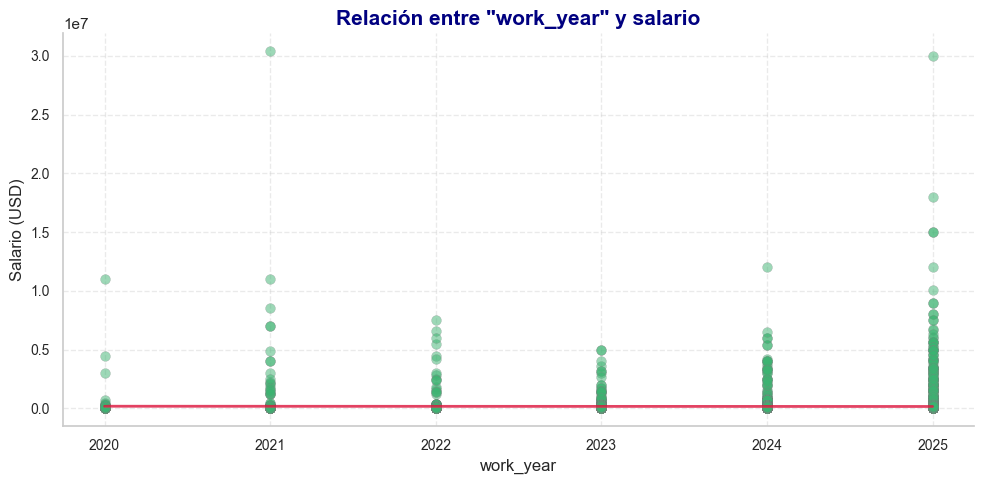

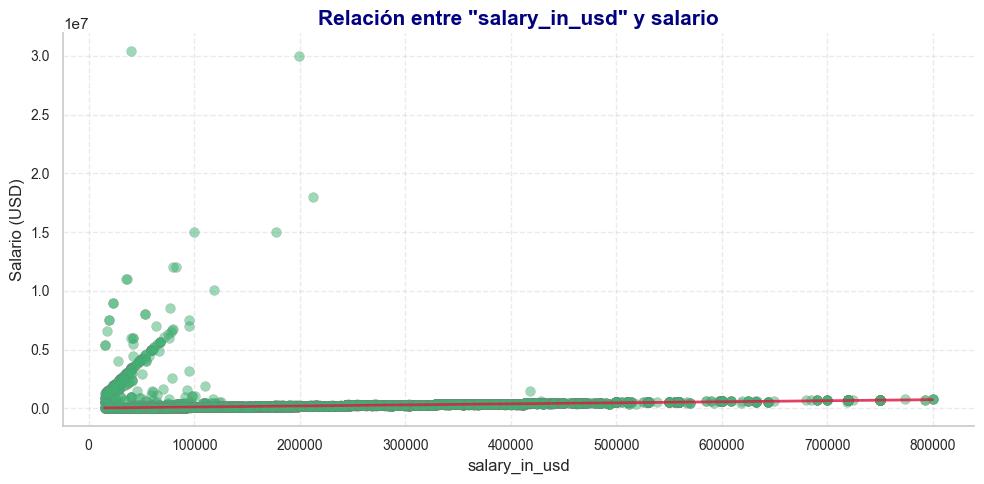

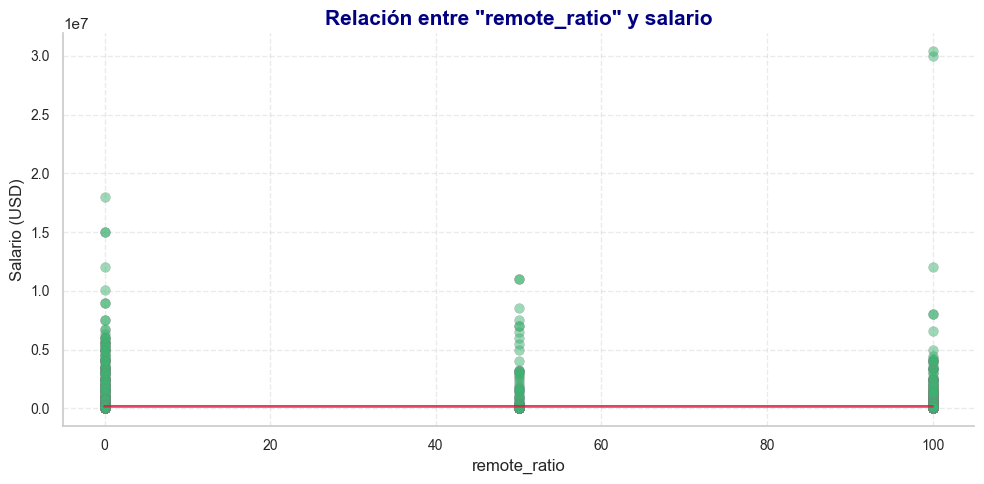

In [9]:

sns.set_style("whitegrid")
scatter_color = 'mediumseagreen'   
line_color = 'crimson'             

for col in numerical_cols:
    if col != 'salary' and col in df.columns:
        plt.figure(figsize=(10, 5))
        
        sns.scatterplot(
            data=df,
            x=col,
            y='salary',
            alpha=0.5,
            s=50,
            color=scatter_color,
            edgecolor='gray',
            linewidth=0.3
        )

        sns.regplot(
            data=df,
            x=col,
            y='salary',
            scatter=False,
            color=line_color,
            line_kws={"linewidth": 2, "alpha": 0.8}
        )

        plt.title(f'Relación entre "{col}" y salario', fontsize=15, fontweight='bold', color='navy')
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Salario (USD)', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.4)
        sns.despine()
        plt.tight_layout()
        plt.show()

#### Boxplot por variables categóricas

C:\Users\LUIS PINO\AppData\Local\Temp\ipykernel_43664\627765490.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\LUIS PINO\AppData\Local\Temp\ipykernel_43664\627765490.py:21: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(


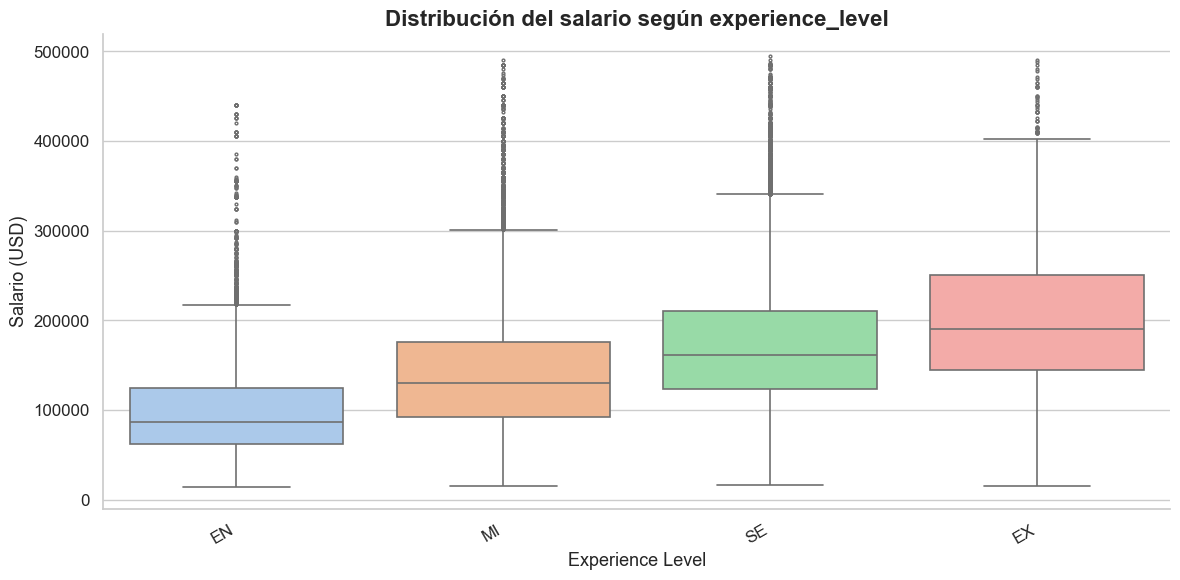

C:\Users\LUIS PINO\AppData\Local\Temp\ipykernel_43664\627765490.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\LUIS PINO\AppData\Local\Temp\ipykernel_43664\627765490.py:21: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(


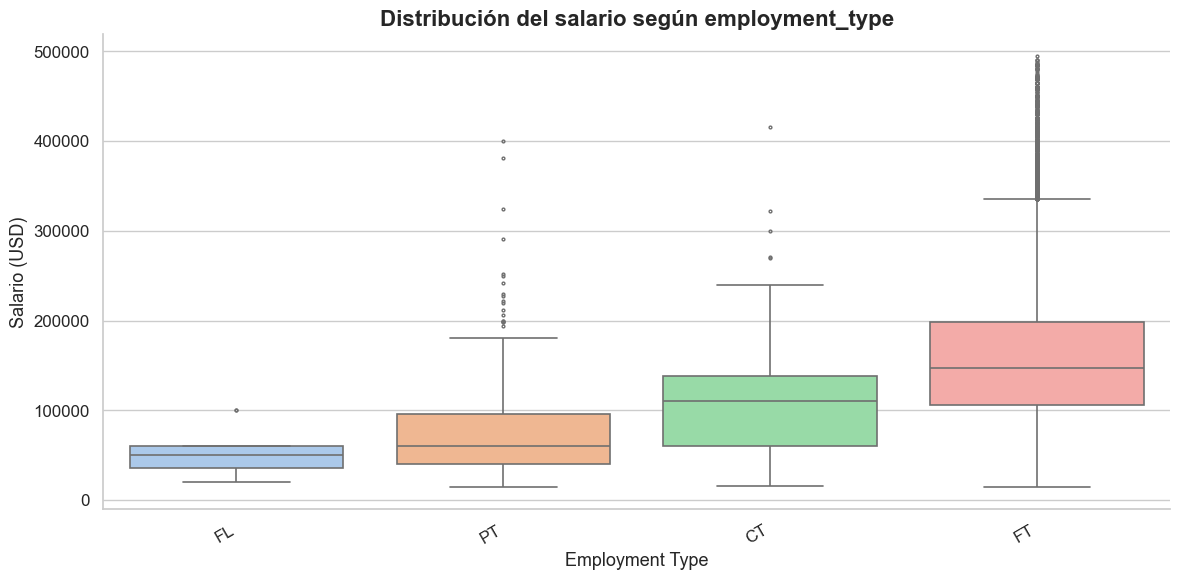

C:\Users\LUIS PINO\AppData\Local\Temp\ipykernel_43664\627765490.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\LUIS PINO\AppData\Local\Temp\ipykernel_43664\627765490.py:21: UserWarning: 
The palette list has fewer values (10) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


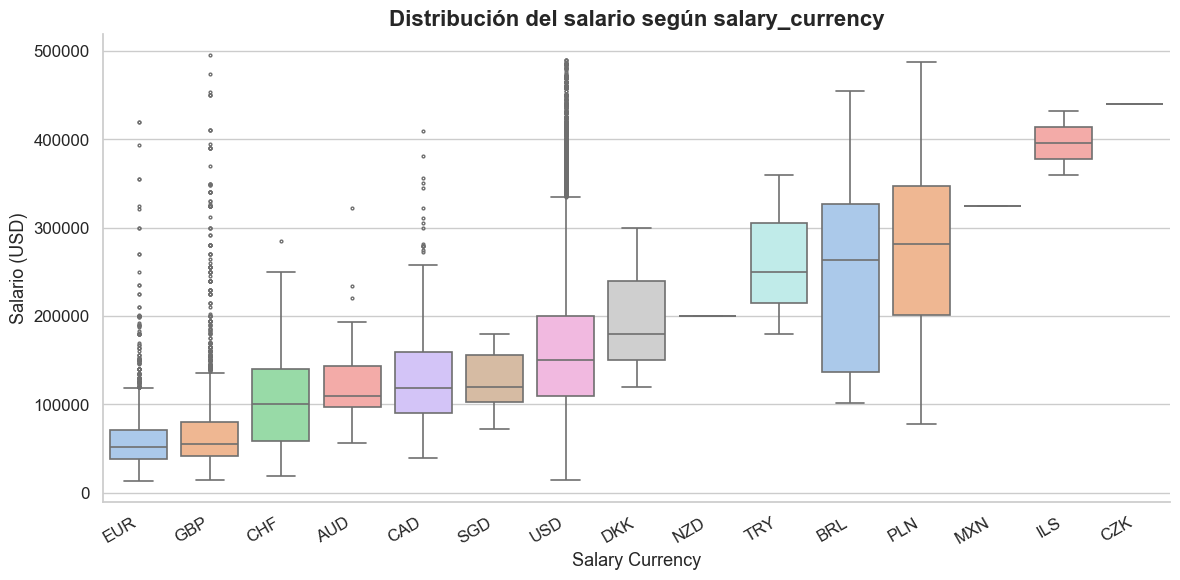

C:\Users\LUIS PINO\AppData\Local\Temp\ipykernel_43664\627765490.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\LUIS PINO\AppData\Local\Temp\ipykernel_43664\627765490.py:21: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.boxplot(


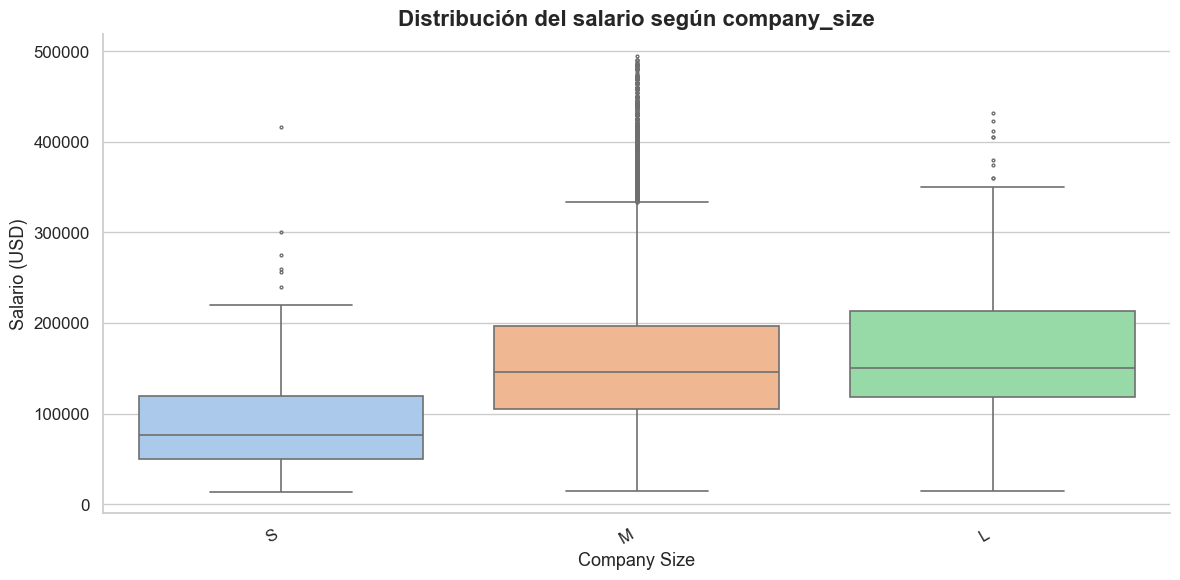

In [5]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font_scale=1.1)
palette = sns.color_palette("pastel")

# Filtrar filas con salarios menores a 500000
df_filtered = df[df['salary'] < 500000]

# Columnas categóricas (tipo object o category)
categorical_cols = df_filtered.select_dtypes(include=['object', 'category']).columns.tolist()

# Excluir columnas no deseadas
excluir_2 = ['job_title', 'employee_residence', 'company_location']
categorical_cols = [col for col in categorical_cols if col not in excluir_2]

# Crear boxplots por cada variable categórica
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    order = df_filtered.groupby(col)['salary'].median().sort_values().index  # ordenado por mediana
    sns.boxplot(
        x=col,
        y='salary',
        data=df_filtered,
        palette=palette,
        order=order,
        linewidth=1.2,
        fliersize=2
    )
    plt.title(f'Distribución del salario según {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col.replace('_', ' ').title(), fontsize=13)
    plt.ylabel('Salario (USD)', fontsize=13)
    plt.xticks(rotation=30, ha='right')
    sns.despine()
    plt.tight_layout()
    plt.show()



In [7]:
# Resumen final
print("EDA completado. Columnas disponibles:", df.columns.tolist())


EDA completado. Columnas disponibles: ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']
